In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import glob
import itertools
import os

from run import Run
from runs_db import db as runs_db

In [2]:
log_path = '/home/fiit/logs'
runs = []

for server in runs_db:
    paths = glob.glob(os.path.join(log_path, server, '*'))
    paths = iter(sorted(paths))
    for (number, type_, code) in runs_db[server]:
        for _ in range(number):
            runs.append(Run(next(paths), type_, code))
        


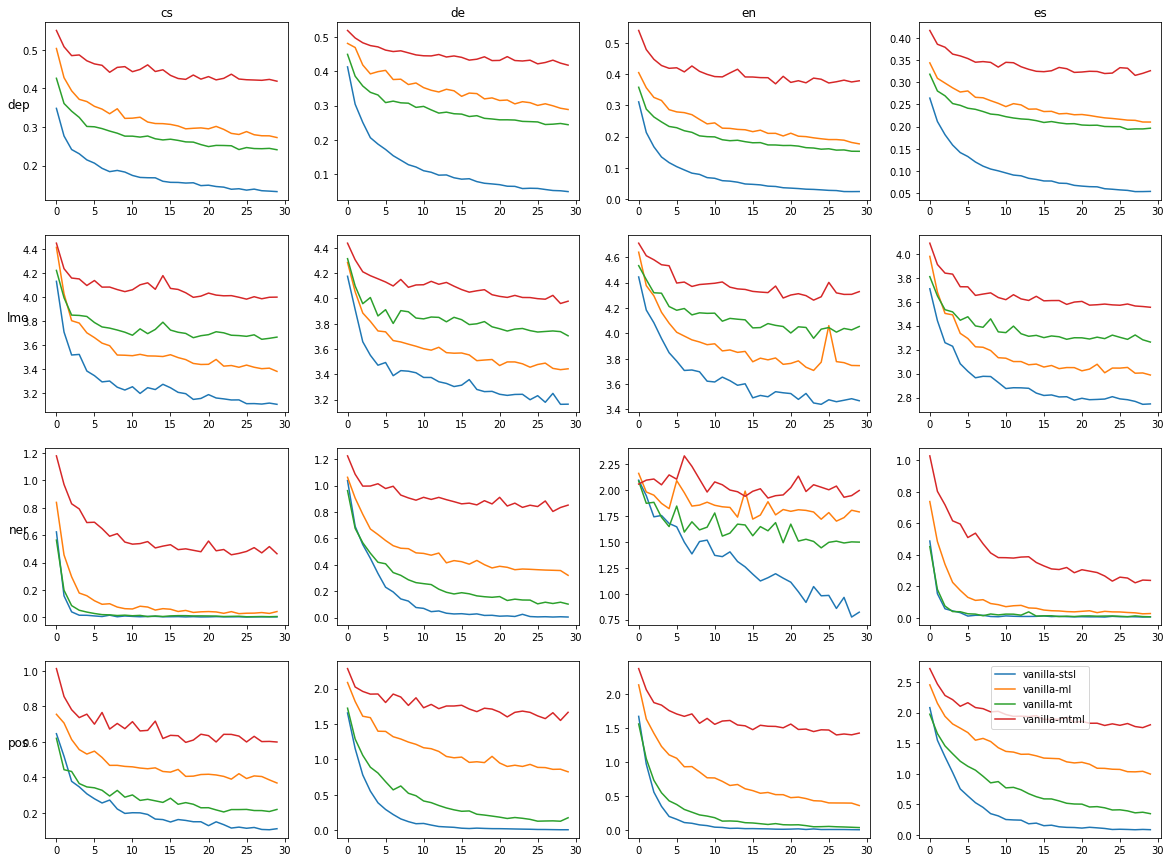

In [3]:
def draw_graphs(metric_func, tasks, langs, role, run_codes=None, run_types=None):
    fig, axes = plt.subplots(len(tasks), len(langs), figsize=(20, 15))

    relevant_runs = ['vanilla']

    for task, lang in itertools.product(tasks, langs):
        for run in runs:
            if (
                run.contains(task, lang) and
                (run_codes is None or run.code in run_codes) and
                (run_types is None or run.type in run_types)
            ):

                history = run.history(
                    metric=metric_func(task),
                    task=task,
                    language=lang,
                    role=role)
                axes[tasks.index(task), langs.index(lang)].plot(list(history), label=f'{run.code}-{run.type}')

    for ax, col in zip(axes[0], langs):
        ax.set_title(col)

    for ax, row in zip(axes[:, 0], tasks):
        ax.set_ylabel(row, rotation=0, size='large')

    plt.legend()        
    plt.show()
    
tasks = ['dep', 'lmo', 'ner', 'pos']
langs = ['cs', 'de', 'en', 'es']

draw_graphs(lambda _: 'loss', tasks, langs, 'train', run_codes=['vanilla'])
        
        

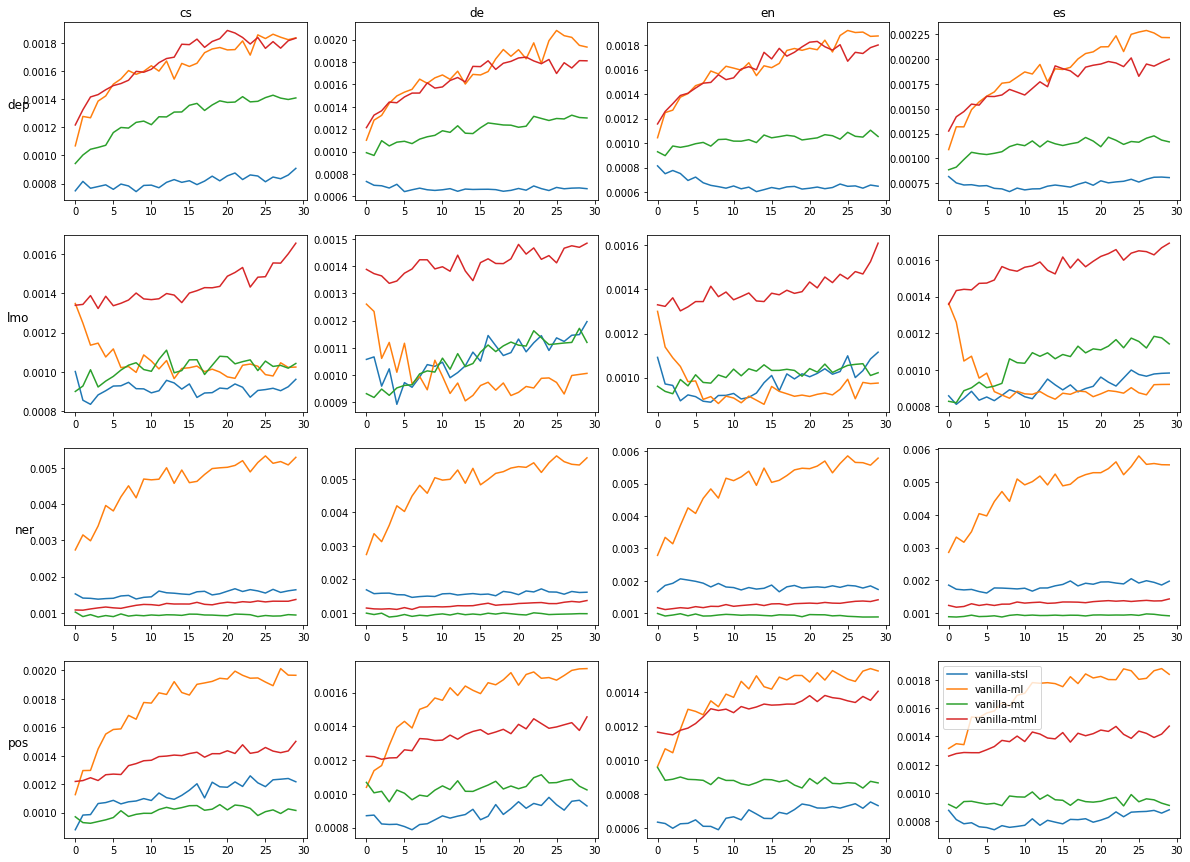

In [4]:
draw_graphs(lambda _: 'unit_strength_2', tasks, langs, 'test', ['vanilla'])

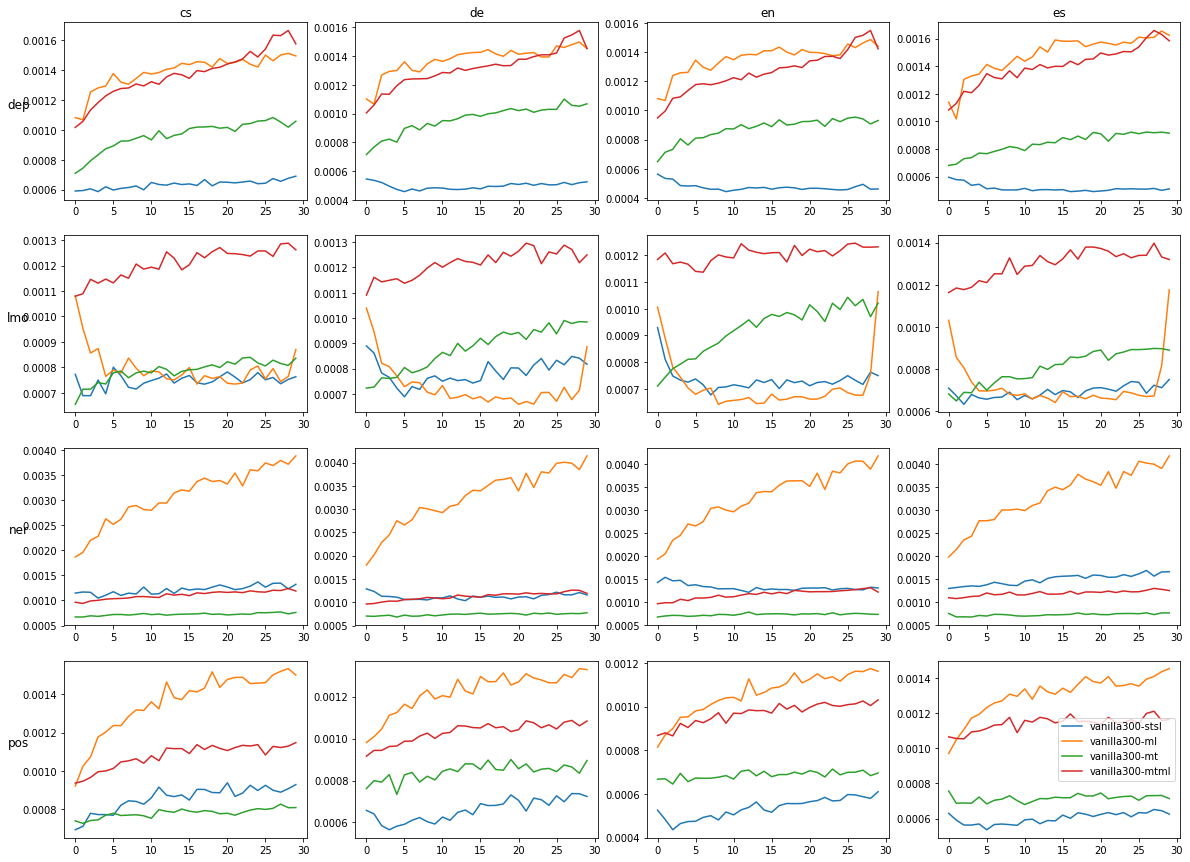

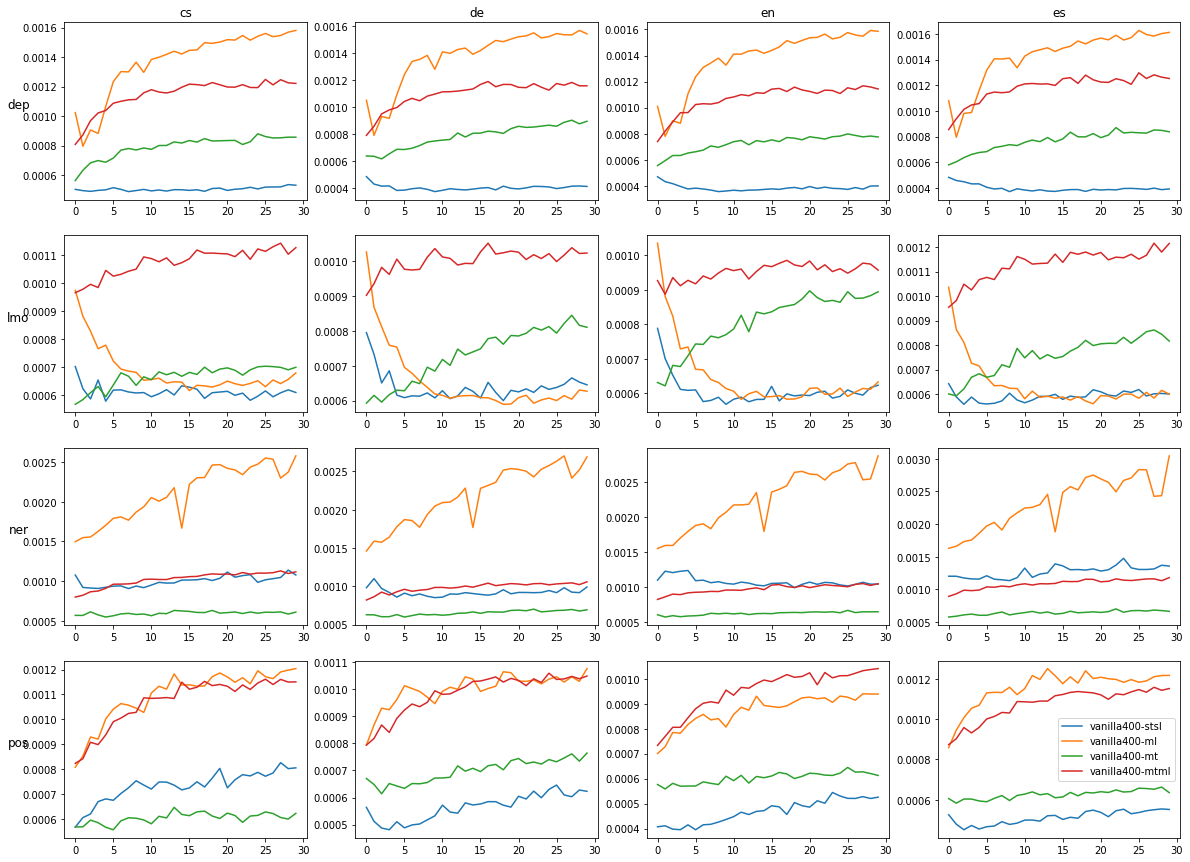

In [5]:
draw_graphs(lambda _: 'unit_strength_2', tasks, langs, 'test', ['vanilla300'])
draw_graphs(lambda _: 'unit_strength_2', tasks, langs, 'test', ['vanilla400'])

In [6]:
task_metr = {
    'dep': 'las',
    'lmo': 'perplexity',
    'ner': 'chunk_f1',
    'pos': 'acc'
}

task_max = {
    'dep': True,
    'lmo': False,
    'ner': True,
    'pos': True
}

def print_results(metric_func, metric_max_func, tasks, langs, run_codes=None, run_types=None):
    
    for task, lang in itertools.product(tasks, langs):
        for run in runs:
            if (
                run.contains(task, lang) and
                (run_codes is None or run.code in run_codes) and
                (run_types is None or run.type in run_types)
            ):
                result = run.metric_eval(
                    metric=metric_func(task),
                    max_=metric_max_func(task),
                    task=task,
                    language=lang)
                print(f'{task} {lang}: {result}')
                
print_results(lambda task: task_metr[task], lambda task: task_max[task], tasks, langs, ['no-adv-task-sharing'], ['ml'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], tasks, langs, ['vanilla'], ['ml'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], tasks, langs, ['dep-adv-lambda-0.25'], ['ml'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], tasks, langs, ['dep-adv-lambda-0.125'], ['ml'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], tasks, langs, ['vanilla'], ['stsl'])

dep cs: (0.8734959651023352, 30)
dep de: (0.7978841185877722, 26)
dep en: (0.8475296402703031, 29)
dep es: (0.8633855061974125, 24)
lmo cs: (19.70932056702154, 30)
lmo de: (19.42577306111369, 30)
lmo en: (35.72242204658282, 30)
lmo es: (18.503844808095856, 30)
ner cs: (0.7823022709475331, 24)
ner de: (0.8207330470388495, 13)
ner en: (0.8466844077553902, 20)
ner es: (0.8698242478403336, 25)
pos cs: (98.74521344695543, 30)
pos de: (94.45811292901956, 30)
pos en: (96.13968356735322, 24)
pos es: (96.57106667872975, 17)
dep cs: (0.83845347267682, 30)
dep de: (0.7775249108131381, 29)
dep en: (0.8266499413264274, 29)
dep es: (0.8509002080883018, 28)
lmo cs: (23.464349638012088, 30)
lmo de: (22.102304065654774, 30)
lmo en: (39.502455004785205, 30)
lmo es: (20.20095495258878, 29)
ner cs: (0.7676609105180533, 15)
ner de: (0.8099239695878351, 27)
ner en: (0.8432002614236697, 27)
ner es: (0.8630259623992838, 17)
pos cs: (98.37793058701533, 30)
pos de: (94.05830975519744, 29)
pos en: (95.9292679966

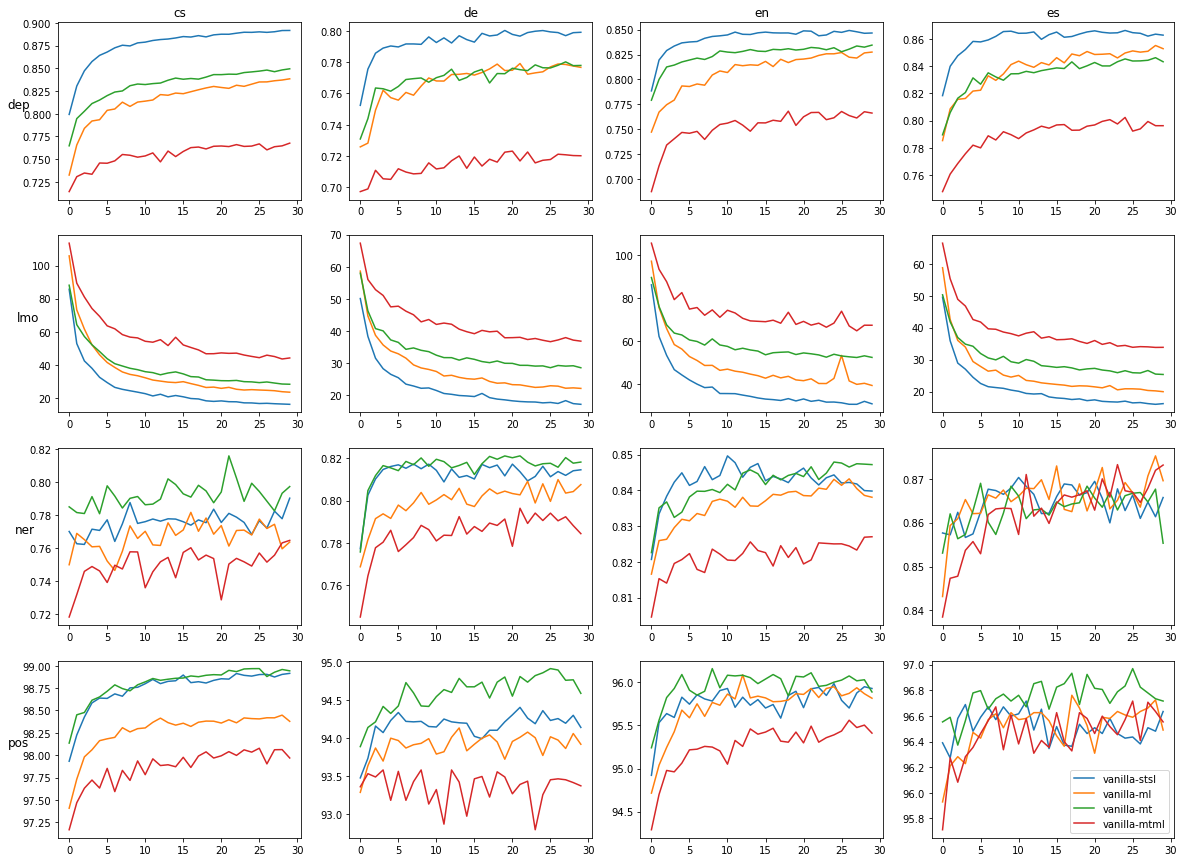

In [7]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test', ['vanilla'])

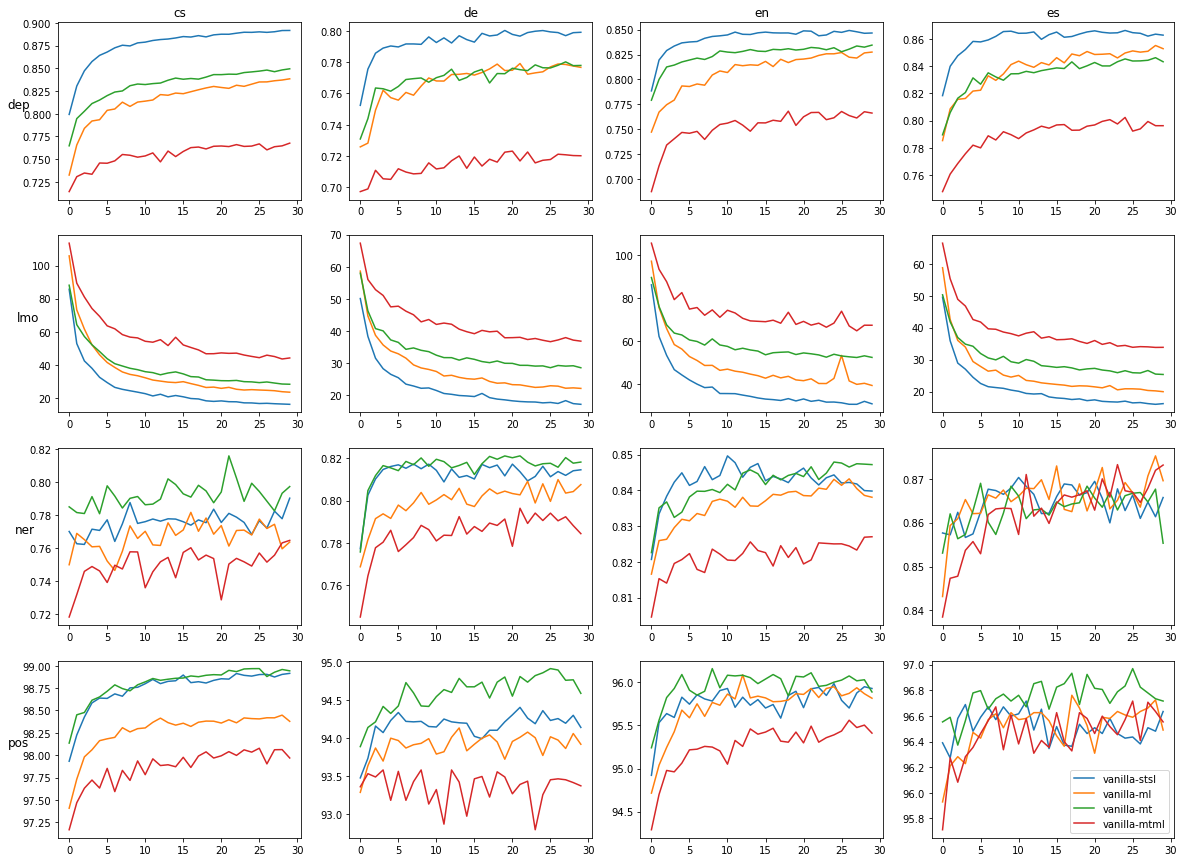

In [8]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test', ['vanilla'])

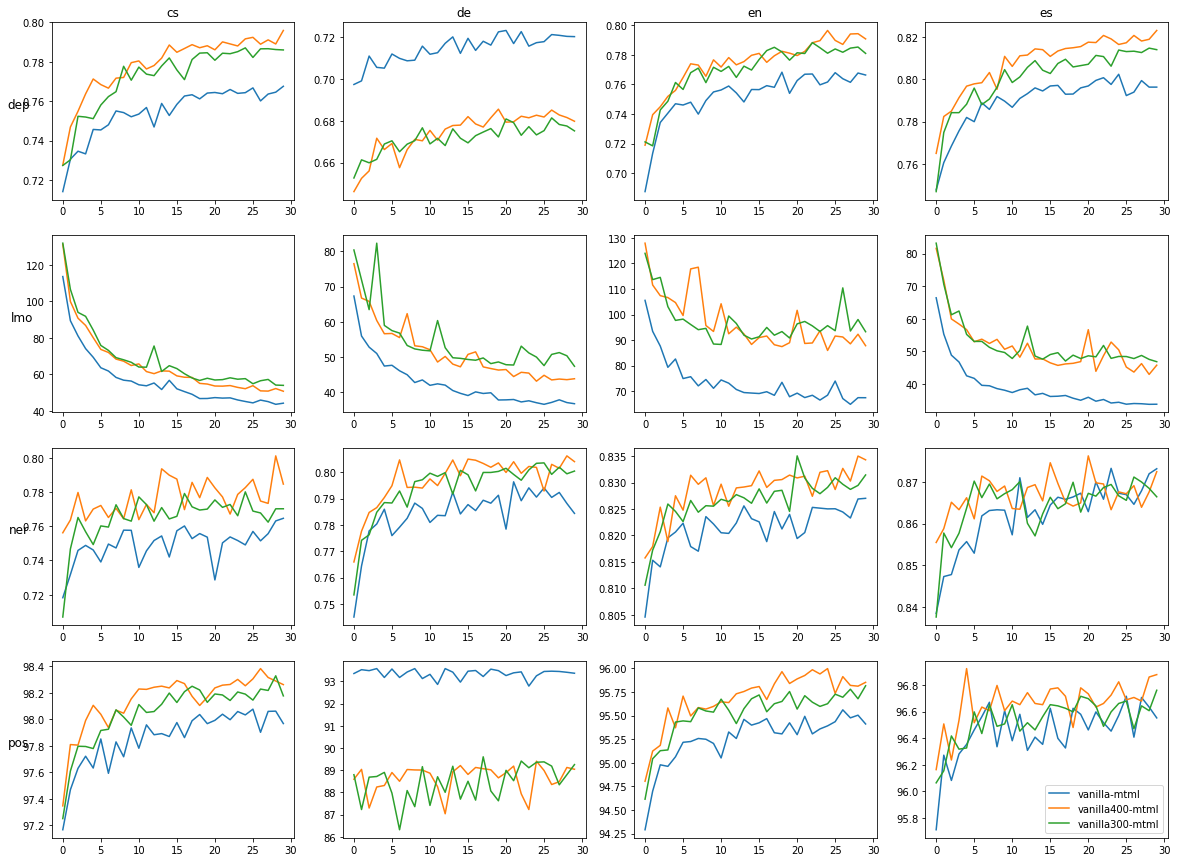

In [10]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test',
            run_codes=['vanilla', 'vanilla300', 'vanilla400'],
            run_types=['mtml'])